In [1]:
!pip install googletrans
!pip install tqdm --upgrade
!pip install twython

  Created wheel for googletrans: filename=googletrans-2.4.0-cp36-none-any.whl size=15777 sha256=0354fe4a4c0f25ea7a4538b2cb4443e51176eb17e05ce7cc902b725b7d6965a2
  Stored in directory: /root/.cache/pip/wheels/50/d6/e7/a8efd5f2427d5eb258070048718fa56ee5ac57fd6f53505f95
Successfully built googletrans
     |████████████████████████████████| 61kB 1.9MB/s 
  Found existing installation: tqdm 4.38.0
    Uninstalling tqdm-4.38.0:
      Successfully uninstalled tqdm-4.38.0


In [0]:
# web scraping
import requests
from bs4 import BeautifulSoup
from time import time, sleep
from random import randint

# Translation
from googletrans import Translator

# Utilities
from tqdm import tqdm
from tqdm import tqdm_notebook
import numpy as np
import pandas as pd

# NLP
from nltk import sent_tokenize, word_tokenize, pos_tag, RegexpParser
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import mark_negation

In [3]:
# Download resources
import nltk

nltk.download("punkt")
nltk.download("vader_lexicon")
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [0]:
def honestdoc_comment(url, hospitalName):
    """
    This function is to scrap data from a webboard (https://www.honestdocs.com).

    INPUT
    url : String
      URL of the target website
    
    OUTPUT
    comment : List
      List of comments
    score : List
      List of rating score
    """
    #create connection
    data = requests.get(url)
    print("requests code : {}".format(data.status_code)) 
    print("note\n2xx: success\n4xx, 5xx: error")
    
    #scrape comment and score
    start_time = time() #start scraping data from page1
    r = requests.get(url, params=dict(query="web scraping",page=1)) 
    soup = BeautifulSoup(r.text,"html.parser")
    n = len(soup.find_all("div",{"class":"comments__content"})) #find n of items in the page
    
    #extract each item
    comment = [soup.find_all("div",
                             {"class":"comments__content"})[i].get_text().strip() for i in range(0,n)]
    score = [soup.find_all("span",
                           {"class":"stars star-rating"})[i].attrs["data-score"] for i in range(0,n)]
    elapsed_time = time() - start_time #finish scraping data from page1
    print("Time used for scraping data from page - 1 : {} s".format(elapsed_time))
    sleep(randint(1,3)) #mimic human behavior
           
    p = 2 #start scraping data from page2
    while n > 0: #until the number of items in a page = 0
        start_time = time() 
        r = requests.get(url, params=dict(query="web scraping",page=p))
        soup = BeautifulSoup(r.text,"html.parser")
        n = len(soup.find_all("div",{"class":"comments__content"}))
        [comment.append(soup.find_all("div",
                                      {"class":"comments__content"})[i].get_text().strip()) for i in range(0,n)]
        [score.append(soup.find_all("span",
                                    {"class":"stars star-rating"})[i].attrs["data-score"]) for i in range(0,n)]
        elapsed_time = time() - start_time
        print("Time used for scraping data from page - {} : {} s".format(p, elapsed_time))
        p +=1
        sleep(randint(1,3))

    df = pd.DataFrame({"comment": comment, 
              "score": score
              })
    
    df["hospital"] = hospitalName
    
    return df

In [29]:
df = honestdoc_comment(r"https://www.honestdocs.co/hospitals/bangkok-hospital", "Bangkok Hospitol")
comments = df

requests code : 200
note
2xx: success
4xx, 5xx: error
Time used for scraping data from page - 1 : 1.3008418083190918 s
Time used for scraping data from page - 2 : 1.30714750289917 s
Time used for scraping data from page - 3 : 1.2254467010498047 s
Time used for scraping data from page - 4 : 1.2697639465332031 s
Time used for scraping data from page - 5 : 1.278280258178711 s
Time used for scraping data from page - 6 : 1.2924602031707764 s
Time used for scraping data from page - 7 : 1.2392418384552002 s
Time used for scraping data from page - 8 : 1.230116367340088 s
Time used for scraping data from page - 9 : 1.2355177402496338 s
Time used for scraping data from page - 10 : 1.2190451622009277 s
Time used for scraping data from page - 11 : 1.3553252220153809 s
Time used for scraping data from page - 12 : 1.243926763534546 s
Time used for scraping data from page - 13 : 1.4381260871887207 s
Time used for scraping data from page - 14 : 1.281968355178833 s
Time used for scraping data from page

In [11]:
comments.shape

(241, 3)

In [0]:
def th2en(comment):
  try:
    textTrans = Translator().translate(comment, src="th", dest="en").text
  except:
    textTrans = ""
    print("\n Can not translate " + comment)

  return textTrans

In [47]:
tqdm.pandas()
comments["en"] = comments.progress_apply(lambda x: th2en(x["comment"]), axis=1)

100%|██████████| 241/241 [00:34<00:00,  7.06it/s]


In [32]:
comments.shape

(241, 3)

In [31]:
comments["hospital"].value_counts()

Bangkok Hospitol    241
Name: hospital, dtype: int64

In [23]:
comments.head()

,comment,score,hospital,en
0,คุณหมอที่แผนกอายุรกรรมเป็นกันเอง วินิจฉัยถูกโร...,4,bangkok-hospital,Doctor of Medicine at the front friendly. The ...
1,เคยไปรักษาตัวอยู่ที่แผนกจิตรักษ์ แผนกดูแลเรื่อ...,5,bangkok-hospital,Been to maintain the spiritual care department...
2,บริการดีมาก รวดเร็ว พาแขกคนจีนไปก็มีล่ามจีนแปล...,3,bangkok-hospital,Very quick service takes guests to the Chinese...
3,มีการบริการดี คุณหมอมีความรู้ความสามารถมาก และ...,4,bangkok-hospital,A good service You are very knowledgeable. May...
4,บริการดีมากชัดเจนดีพยาบาลก็พูดดีบุคลากรพูดดีหม...,5,bangkok-hospital,"Service very good, clear medical personnel say..."


In [48]:
from google.colab import drive
drive.mount('/content/gdrive')

import os
os.chdir('/content/gdrive/My Drive/DS532')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
#backup data 
comments.to_csv("comment_bangkok-hospital.csv", index=False)

In [0]:
comments = pd.read_csv("comment_bangkok-hospital.csv")

In [0]:
def sent_level_polarity(df, target):
  sentences = []
  scores = []
  hospitals = []
  cids = []
  for i in df.index:
    en = df.loc[i, target]
    score = df.loc[i, "score"]
    hospital = df.loc[i, "hospital"]
    s = sent_tokenize(en)
    sentences = sentences + s
    scores = scores + [score]*len(s)
    hospitals = hospitals + [hospital]*len(s)
    cids = cids + [i]*len(s)
  return pd.DataFrame({"cid": cids
                       , "sentences": sentences
                       , "scores": scores
                       , "hospital": hospitals})

In [0]:
def predict_sentiment(sentence):
  sa = SentimentIntensityAnalyzer()
  sentiment_distribution = sa.polarity_scores(sentence)
  score = sentiment_distribution.get("compound")
  
  if score >= 0.05:
    return "positive"
  elif score <= -0.05:
    return "negative"
  else:
    return "neutral"

In [0]:
data = sent_level_polarity(df=comments, target="en")
data["sentiment_polarity"] = data["sentences"].apply(lambda x: predict_sentiment(x))

In [55]:
data.shape

(759, 5)

In [56]:
data.head()

,cid,sentences,scores,hospital,sentiment_polarity
0,0,Doctor of Medicine at the front friendly.,4,Bangkok Hospitol,positive
1,0,The disease is diagnosed quickly Doctor explai...,4,Bangkok Hospitol,positive
2,0,"Waited a long time coming, but if the patient ...",4,Bangkok Hospitol,negative
3,0,"Overall, then it's hard.",4,Bangkok Hospitol,negative
4,0,Quick and easy good for people who do not want...,4,Bangkok Hospitol,positive


**Exclude Neutral**

Neutral comments will be excluded.

In [0]:
data = data[data["sentiment_polarity"] != "neutral"].reset_index(drop=True)

In [58]:
data.shape

(471, 5)

In [59]:
data.head()

,cid,sentences,scores,hospital,sentiment_polarity
0,0,Doctor of Medicine at the front friendly.,4,Bangkok Hospitol,positive
1,0,The disease is diagnosed quickly Doctor explai...,4,Bangkok Hospitol,positive
2,0,"Waited a long time coming, but if the patient ...",4,Bangkok Hospitol,negative
3,0,"Overall, then it's hard.",4,Bangkok Hospitol,negative
4,0,Quick and easy good for people who do not want...,4,Bangkok Hospitol,positive


## Marking Negation  
Negation twists sentiment polarity.  Let's mark them and twist sentiment polarity.

In [0]:
data["neg_mark"] = data["sentences"].apply(lambda x: " ".join(mark_negation(x.split())))

In [0]:
data["flag"] = data["neg_mark"].apply(lambda x: True if "_NEG" in x else False)

In [0]:
def neg_extract(text):
  tokens = word_tokenize(text)
  return " ".join([token[0:-4] if token[-4:] == "_NEG" else token for token in tokens])

In [0]:
data["neg_words"] = data["neg_mark"].apply(lambda x: neg_extract(x))

In [0]:
data["post_polarity"] = data["neg_words"].apply(lambda x: predict_sentiment(x))

In [65]:
data2 = data[data["sentiment_polarity"] != data["post_polarity"]].reset_index(drop=True)
data2.head()

,cid,sentences,scores,hospital,sentiment_polarity,neg_mark,flag,neg_words,post_polarity


In [66]:
data.shape

(471, 9)

In [67]:
data.head()

,cid,sentences,scores,hospital,sentiment_polarity,neg_mark,flag,neg_words,post_polarity
0,0,Doctor of Medicine at the front friendly.,4,Bangkok Hospitol,positive,Doctor of Medicine at the front friendly.,False,Doctor of Medicine at the front friendly .,positive
1,0,The disease is diagnosed quickly Doctor explai...,4,Bangkok Hospitol,positive,The disease is diagnosed quickly Doctor explai...,False,The disease is diagnosed quickly Doctor explai...,positive
2,0,"Waited a long time coming, but if the patient ...",4,Bangkok Hospitol,negative,"Waited a long time coming, but if the patient ...",False,"Waited a long time coming , but if the patient...",negative
3,0,"Overall, then it's hard.",4,Bangkok Hospitol,negative,"Overall, then it's hard.",False,"Overall , then it 's hard .",negative
4,0,Quick and easy good for people who do not want...,4,Bangkok Hospitol,positive,Quick and easy good for people who do not want...,True,Quick and easy good for people who do not want...,positive


# Parsing

In [0]:
grammar = """NP: {<NN|NNS>+}
                {<NN|NNS>+<CC><NN|NNS>+}"""
chunker = RegexpParser(grammar)

def parsing_extract(sentence):
  parsed_tree = chunker.parse(pos_tag(word_tokenize(sentence)))

  nps = []
  for subtree in parsed_tree.subtrees():
      if subtree.label() == 'NP':
          t = subtree
          t = " ".join(word for word, tag in t.leaves())
          nps.append(t)
  return nps

In [0]:
data["NP"] = data["sentences"].apply(lambda x: parsing_extract(x))

In [70]:
data.shape

(471, 10)

In [71]:
data.head()

,cid,sentences,scores,hospital,sentiment_polarity,neg_mark,flag,neg_words,post_polarity,NP
0,0,Doctor of Medicine at the front friendly.,4,Bangkok Hospitol,positive,Doctor of Medicine at the front friendly.,False,Doctor of Medicine at the front friendly .,positive,"[Doctor, front]"
1,0,The disease is diagnosed quickly Doctor explai...,4,Bangkok Hospitol,positive,The disease is diagnosed quickly Doctor explai...,False,The disease is diagnosed quickly Doctor explai...,positive,"[disease, care, employees, jar queue, patient]"
2,0,"Waited a long time coming, but if the patient ...",4,Bangkok Hospitol,negative,"Waited a long time coming, but if the patient ...",False,"Waited a long time coming , but if the patient...",negative,"[time, patient, bit]"
3,0,"Overall, then it's hard.",4,Bangkok Hospitol,negative,"Overall, then it's hard.",False,"Overall , then it 's hard .",negative,[]
4,0,Quick and easy good for people who do not want...,4,Bangkok Hospitol,positive,Quick and easy good for people who do not want...,True,Quick and easy good for people who do not want...,positive,[people]


# Split dataframe into positive and negative sentiment

In [0]:
pos = data[data["sentiment_polarity"] == "positive"].reset_index(drop=True)
pos_words = sum(pos["NP"].tolist(), [])
pos_words = [word.lower() for word in pos_words]
poshist = pd.DataFrame({"words": pos_words})
poshist = poshist.groupby("words").size().reset_index(name="#pos")

In [73]:
poshist.sort_values(by='#pos', ascending=False)

,words,#pos
303,service,55
109,doctor,45
55,care,35
177,hospital,28
113,doctors,26
...,...,...
141,family likes,1
140,family friend,1
139,family doctor,1
137,families,1


In [0]:
neg = data[data["sentiment_polarity"] == "negative"].reset_index(drop=True)
neg_words = sum(neg["NP"].tolist(), [])
neg_words = [word.lower() for word in neg_words]
neghist = pd.DataFrame({"words": neg_words})
neghist = neghist.groupby("words").size().reset_index(name="#neg")

In [75]:
neghist.sort_values(by='#neg', ascending=False)

,words,#neg
187,time,13
94,hospital,13
54,doctor,12
168,service,10
146,patients,9
...,...,...
77,failure,1
78,falls,1
79,father,1
80,fee,1


In [0]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [0]:
def vizwordcloud(df):
    tuples = [tuple(x) for x in df.values]
    wordcloud = WordCloud().generate_from_frequencies(dict(tuples))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

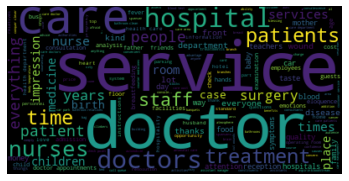

In [78]:
vizwordcloud(poshist)

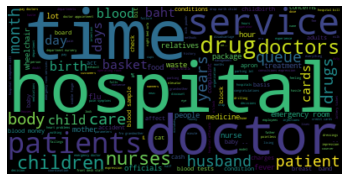

In [79]:
vizwordcloud(neghist)